## Imports

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import *
from keras.layers import *
from keras.callbacks import *
import sklearn
import pickle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MaxAbsScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,accuracy_score

## Self written Helper Function

In [3]:
from eegutils import utils

## Read Data

In [5]:
PATH = "data/alldata"
x_train, y_train = utils.readDataShuffled(PATH)

data/alldata/total
appended data/alldata/total/yuchae_lie4.csv
appended data/alldata/total/yuchae_truth9.csv
appended data/alldata/total/amy_truth6.csv
appended data/alldata/total/luis_lie9.csv
appended data/alldata/total/tony_truth2.csv
appended data/alldata/total/chris_truth2.csv
appended data/alldata/total/jiwon_truth9.csv
appended data/alldata/total/amy_lie2.csv
appended data/alldata/total/sam_lie10.csv
appended data/alldata/total/jiwon_truth3.csv
appended data/alldata/total/chris_lie10.csv
appended data/alldata/total/tony_lie3.csv
appended data/alldata/total/jiwon_lie6.csv
appended data/alldata/total/tony_truth4.csv
appended data/alldata/total/namhee_truth4.csv
appended data/alldata/total/namhee_lie6.csv
appended data/alldata/total/sam_truth2.csv
appended data/alldata/total/yuchae_truth4.csv
appended data/alldata/total/amy_truth7.csv
appended data/alldata/total/luis_truth8.csv
appended data/alldata/total/tony_truth10.csv
appended data/alldata/total/namhee_truth10.csv
appended data

C:\Users\Areeba Vohra\Documents\DSA Project\eegutils\utils.py:73: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X = np.array(X)


## check shape of data

In [6]:
print(x_train.shape)
print(y_train.shape)

(160,)
(160,)


## Pad Sequence to make them all same length

In [7]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=1000, padding = 'post')
x_train.shape

(160, 1000, 2)

In [8]:
X = np.array(x_train)
y = np.array(y_train)
X.shape

(160, 1000, 2)

## Data Visualization

#### Truth EEG spectrum

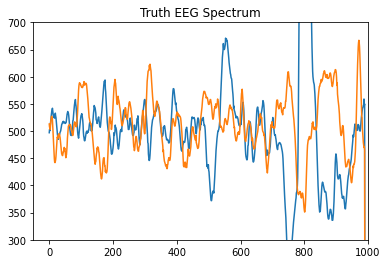

In [8]:
for i in range(len(y_train)):
    if y_train[i] == 1:
        break
plt.plot(x_train[i])
plt.title("Truth EEG Spectrum")
plt.xlim(right = 1000)
plt.ylim(300, 700)
plt.show()

#### Lie EEG spectrum

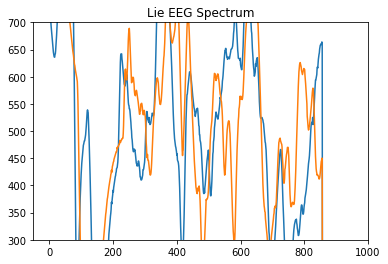

In [9]:
for i in range(len(y_train)):
    if y_train[i] == 0:
        break
plt.plot(x_train[i])
plt.title("Lie EEG Spectrum")
plt.xlim(right = 1000)
plt.ylim(300, 700)
plt.show()

## LSTM Model with 3 Layers

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, 
               input_shape=(1000, 2)))              
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=True))         
model.add(LSTM(32))                                 
model.add(Dense(1, activation='sigmoid'))           

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])                
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1000, 64)          17152     
_________________________________________________________________
dropout (Dropout)            (None, 1000, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000, 64)          33024     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 62,625
Trainable params: 62,625
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(X, y, validation_split = 0.3, epochs = 15, batch_size = 10) 

Epoch 1/15
12/12 [==============================] - 21s 2s/step - loss: 0.6994 - accuracy: 0.4732 - val_loss: 0.6894 - val_accuracy: 0.5625
Epoch 2/15
12/12 [==============================] - 20s 2s/step - loss: 0.6860 - accuracy: 0.5357 - val_loss: 0.6816 - val_accuracy: 0.5833
Epoch 3/15
12/12 [==============================] - 18s 2s/step - loss: 0.6773 - accuracy: 0.5714 - val_loss: 0.6819 - val_accuracy: 0.5833
Epoch 4/15
12/12 [==============================] - 18s 1s/step - loss: 0.6686 - accuracy: 0.5714 - val_loss: 0.6760 - val_accuracy: 0.5833
Epoch 5/15
12/12 [==============================] - 19s 2s/step - loss: 0.6553 - accuracy: 0.5714 - val_loss: 0.6679 - val_accuracy: 0.5833
Epoch 6/15
12/12 [==============================] - 17s 1s/step - loss: 0.6411 - accuracy: 0.5982 - val_loss: 0.6536 - val_accuracy: 0.5833
Epoch 7/15
12/12 [==============================] - 17s 1s/step - loss: 0.6194 - accuracy: 0.6161 - val_loss: 0.6335 - val_accuracy: 0.6667
Epoch 8/15
12/12 [==

## Saving the model

In [16]:
model.save("firstworking.h5")

## Accuracy

In [17]:
predictX = x_train[:30].reshape((30, 1000, 2))
model = load_model("firstworking.h5")
_, acc = model.evaluate(predictX, y_train[:30])
print("Accuracy:" + str(acc))

1/1 [==============================] - 0s 0s/step - loss: 0.5139 - accuracy: 0.6000
Accuracy:0.6000000238418579


## Plotting Loss and Accuracy

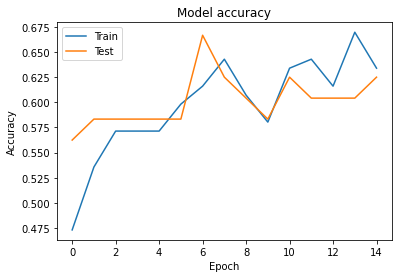

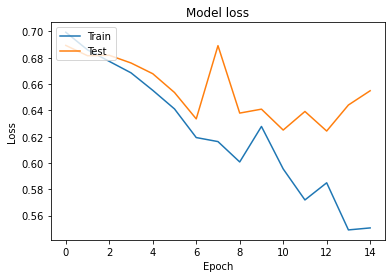

In [18]:
#Plot values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## LSTM Model with 4 layers

In [9]:
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True,
               input_shape=(2000, 2)))  # returns a sequence of vectors of dimension 32
model2.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model2.add(LSTM(32, return_sequences=True))  # return a single vector of dimension 32
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))

mc_test = ModelCheckpoint('best_test_model.h5', monitor='accuracy', mode='max', verbose = 1, save_best_only=True)
mc_val = ModelCheckpoint('best_val_model.h5', monitor='val_accuracy', mode='max', verbose = 1, save_best_only=True)  #Save best model accuracy

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2000, 128)         67072     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2000, 64)          49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 2000, 32)          12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 137,249
Trainable params: 137,249
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X, y, validation_split = 0.3, epochs = 40, batch_size = 4, callbacks=[mc_test, mc_val])  # Train for 40 epochs on 70% of the data

Epoch 1/40
28/28 [==============================] - 86s 3s/step - loss: 0.7038 - acc: 0.5268 - val_loss: 0.6872 - val_acc: 0.5417
Epoch 2/40
28/28 [==============================] - 75s 3s/step - loss: 0.6919 - acc: 0.5804 - val_loss: 0.6914 - val_acc: 0.5208
Epoch 3/40
21/28 [=====================>........] - ETA: 17s - loss: 0.6787 - acc: 0.5833

## Loss and Accuracy plots

In [4]:
#Plot values
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

NameError: name 'history2' is not defined

## Saved Models

In [59]:
predictX = x_train[:30].reshape((30, 1000, 2))
model = load_model("firstworking.h5")
_, acc = model.evaluate(predictX, y_train[:30])
print("Accuracy:" + str(acc))

1/1 [==============================] - 0s 1ms/step - loss: 0.5139 - accuracy: 0.6000
Accuracy:0.6000000238418579


## Accuracy on total dataset

In [112]:
val_model = model = load_model('best_test_model.h5')
_, overall_acc = val_model.evaluate(X, y, verbose=0)
print('Accuracy on total data set: %.3f' % (overall_acc))
accuracy.append(clf.score(X_test,y_test)*100)

Accuracy on total data set: 0.669


## Convert data from 3d to 2d for traditional algorithms

In [61]:
X_all= X
X_all = X_all.reshape(160,2000)
y.shape
X_all.shape

(160, 2000)

## Split data into train and test

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y,test_size=0.3, random_state=42)

In [104]:
accuracy = []

## Decision Tree

In [106]:
clf = DecisionTreeClassifier(criterion="entropy",random_state=42, max_depth=9)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)
accuracy.append(clf.score(X_test,y_test)*100)

Testing acc= 72.91666666666666
Training acc= 100.0


## Plot Tree

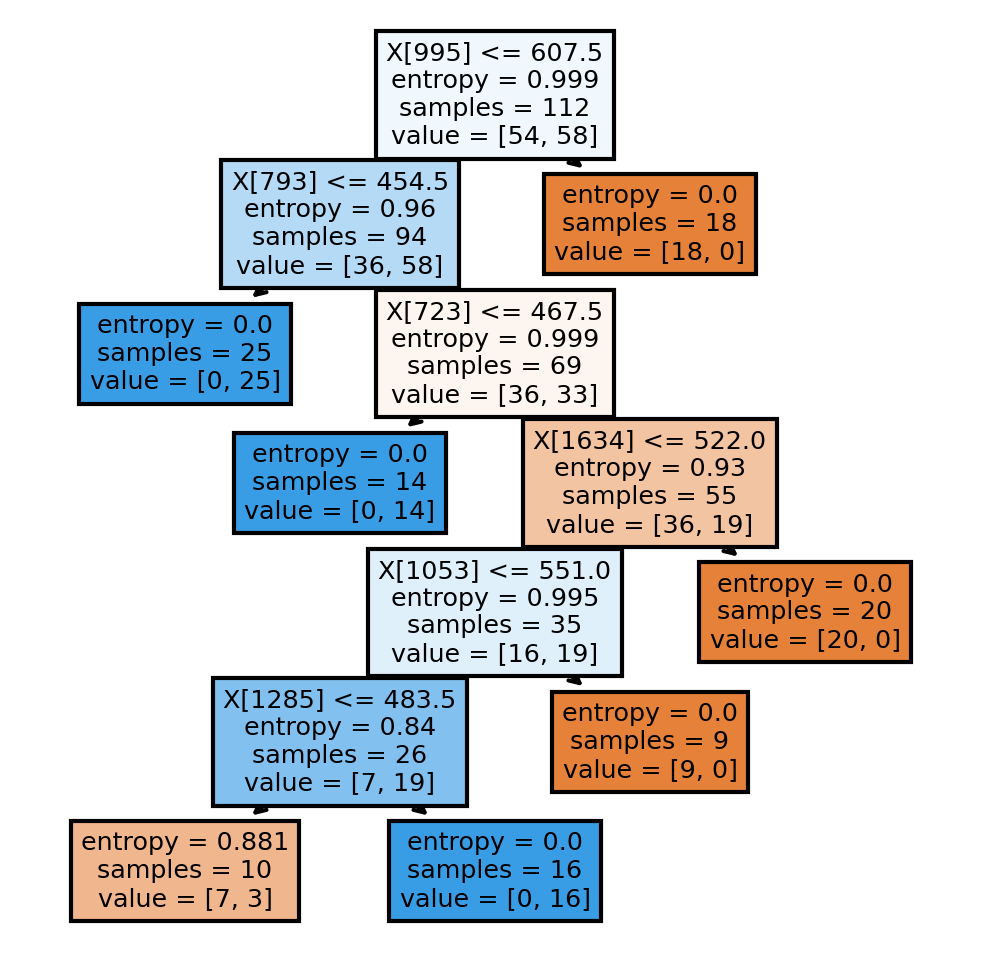

In [65]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
sklearn.tree.plot_tree(clf,
               filled = True);
fig.savefig('imagename.png')

## HyperParameter Tuning

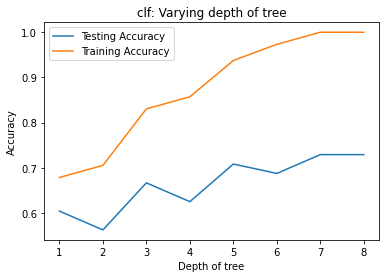

In [66]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

## Plot Actual vs Predicted

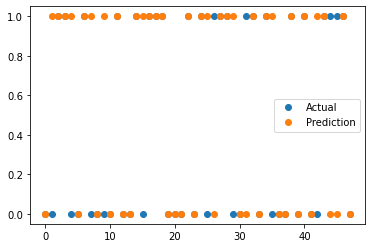

In [68]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.legend()

Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7291666666666666')

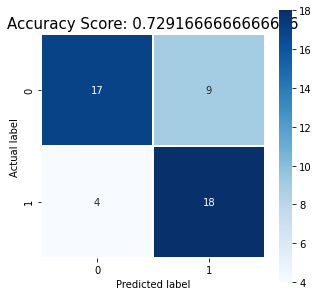

In [69]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Random Forest

In [107]:
clf = RandomForestClassifier(criterion="entropy",random_state=43,max_depth=4)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)
accuracy.append(clf.score(X_test,y_test)*100)

Testing acc= 77.08333333333334
Training acc= 99.10714285714286


## HyperParameter Tuning

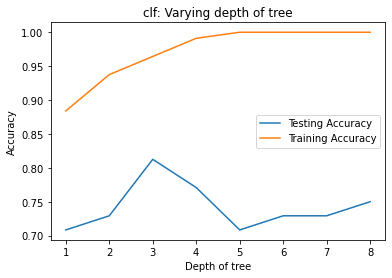

In [71]:
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):
   
    clf = RandomForestClassifier(criterion="entropy",random_state=43,max_depth=k)
    clf.fit(X_train, y_train)

    train_accuracy[i] = clf.score(X_train, y_train)

    test_accuracy[i] = clf.score(X_test, y_test)

plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

## Plot Actual vs Predicted

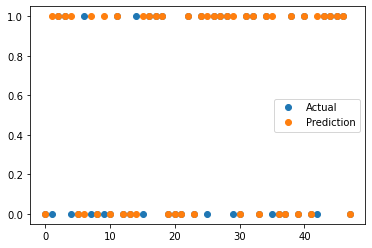

In [72]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.legend()

## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.75')

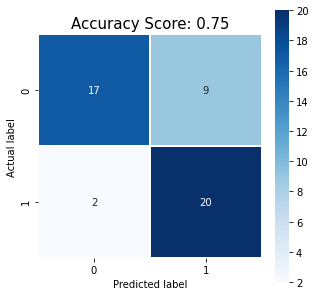

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## KNN

In [108]:
clf = KNeighborsClassifier(n_neighbors=1)
clf=clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy=",metrics.accuracy_score(y_test,y_pred))
print("Testing acc=",clf.score(X_test,y_test)*100)

print("Training acc=",clf.score(X_train,y_train)*100)
accuracy.append(clf.score(X_test,y_test)*100)

Testing acc= 81.25
Training acc= 100.0


## HyperParameter Tuning

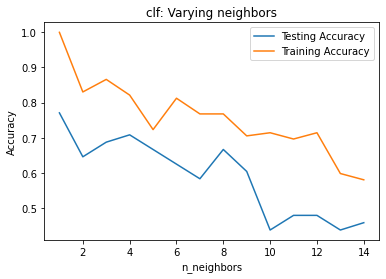

In [75]:
dep = np.arange(1, 15)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):
   
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)

    train_accuracy[i] = clf.score(X_train, y_train)
    test_accuracy[i] = clf.score(X_test, y_test)

plt.title('clf: Varying neighbors')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

## Plot Actual vs Predicted

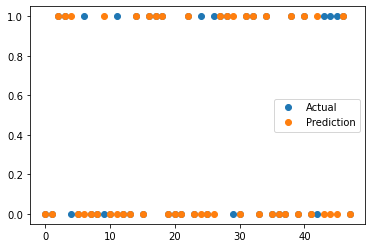

In [77]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.legend()

## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.4583333333333333')

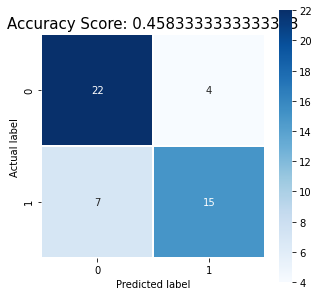

In [78]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## SVC

In [109]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
clf=SVC(kernel='rbf', C=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred)*100)
print("Training acc=",clf.score(X_train,y_train)*100)
accuracy.append(clf.score(X_test,y_test)*100)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.79      0.68      0.73        22

    accuracy                           0.77        48
   macro avg       0.77      0.76      0.77        48
weighted avg       0.77      0.77      0.77        48

accuracy is  77.08333333333334
Training acc= 100.0


## HyperParameter Tuning

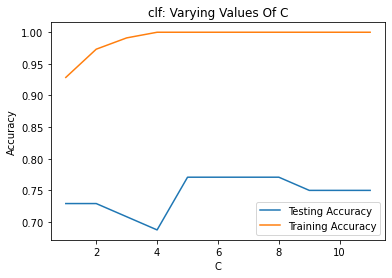

In [80]:
dep = np.arange(1, 12)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

for i, k in enumerate(dep):

    clf = SVC(kernel='rbf', C=k)
    clf.fit(X_train, y_train)

    train_accuracy[i] = clf.score(X_train, y_train)
    test_accuracy[i] = clf.score(X_test, y_test)

plt.title('clf: Varying Values Of C')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.show()

## Plot Actual vs Predicted

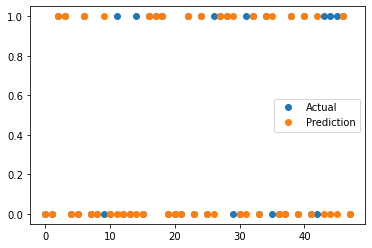

In [82]:
plt.plot(y_test, 'o', label = 'Actual')
plt.plot(y_pred, 'o',  label = 'Prediction')
plt.legend()

## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.7708333333333334')

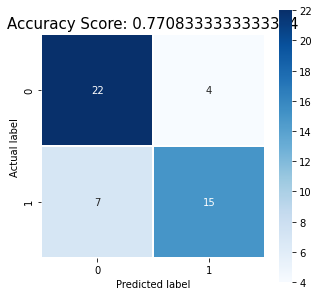

In [83]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Logistic Regression

In [110]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

clf=LogisticRegression(C=7)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))
print('accuracy is ',accuracy_score(y_test, y_pred)*100)
print("Training acc=",clf.score(X_train,y_train)*100)
accuracy.append(clf.score(X_test,y_test)*100)

              precision    recall  f1-score   support

           0       0.68      0.73      0.70        26
           1       0.65      0.59      0.62        22

    accuracy                           0.67        48
   macro avg       0.66      0.66      0.66        48
weighted avg       0.67      0.67      0.66        48

accuracy is  66.66666666666666
Training acc= 100.0


## ANN

In [113]:
model = Sequential()
model.add(Dense(12, input_shape=(160,2000), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train,y_train,validation_split = 0.3, epochs=40, batch_size=30)
# acc = model.evaluate(X_test, y_test)
# training_accuracy = model.evaluate(X_train, y_train)[1]
# print("Training acc=",training_accuracy*100)
# acc
_, overall_acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on total data set: %.3f' % (overall_acc))
accuracy.append(clf.score(X_test,y_test)*100)

Epoch 1/40
3/3 [==============================] - 0s 58ms/step - loss: 0.7020 - accuracy: 0.5769 - val_loss: 0.6146 - val_accuracy: 0.6471
Epoch 2/40
3/3 [==============================] - 0s 11ms/step - loss: 0.5121 - accuracy: 0.7436 - val_loss: 0.5560 - val_accuracy: 0.7059
Epoch 3/40
3/3 [==============================] - 0s 9ms/step - loss: 0.4279 - accuracy: 0.7821 - val_loss: 0.5269 - val_accuracy: 0.6765
Epoch 4/40
3/3 [==============================] - 0s 11ms/step - loss: 0.3617 - accuracy: 0.7949 - val_loss: 0.5234 - val_accuracy: 0.6471
Epoch 5/40
3/3 [==============================] - 0s 11ms/step - loss: 0.3209 - accuracy: 0.7949 - val_loss: 0.5264 - val_accuracy: 0.7353
Epoch 6/40
3/3 [==============================] - 0s 9ms/step - loss: 0.2891 - accuracy: 0.8205 - val_loss: 0.5473 - val_accuracy: 0.6471
Epoch 7/40
3/3 [==============================] - 0s 10ms/step - loss: 0.2655 - accuracy: 0.8462 - val_loss: 0.5721 - val_accuracy: 0.6471
Epoch 8/40
3/3 [=============

## Confusion Matrix

Text(0.5, 1.0, 'Accuracy Score: 0.6666666666666666')

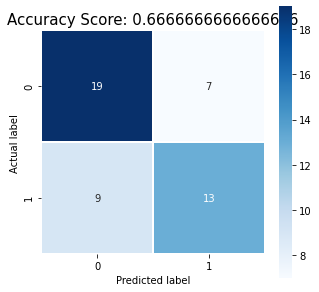

In [86]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

## Loss and Accuracy plot

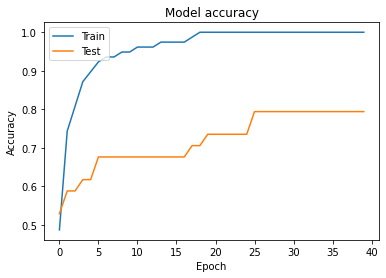

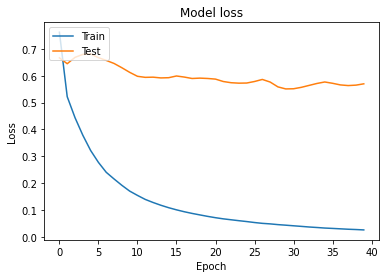

In [87]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Comparative Analysis

In [114]:
accuracy

[72.91666666666666,
 77.08333333333334,
 81.25,
 77.08333333333334,
 66.66666666666666,
 66.66666666666666,
 66.66666666666666]

Text(0.5, 1.0, 'Classifiers')

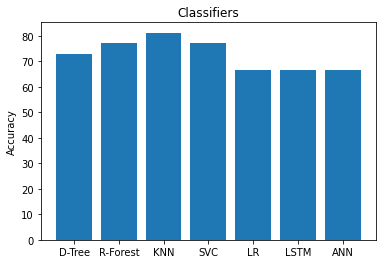

In [115]:
classifier=['D-Tree', 'R-Forest', 'KNN', 'SVC', 'LR', 'LSTM', 'ANN']
y_pos = np.arange(len(classifier))
plt.bar(y_pos,np.array(accuracy))
plt.xticks(y_pos, classifier)
plt.ylabel('Accuracy')
plt.title('Classifiers')